<a href="https://colab.research.google.com/github/feysel2003/ML/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle Dataset** - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

**The SMS Spam Collection is a set of SMS-tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to being ham (legitimate) or spam.**

**Step 1 — Import Libraries**

This step imports all libraries needed for data processing, visualization, NLP, and machine learning.

In [16]:
# Import basic libraries
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# NLP preprocessing tools
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [17]:
# Train-test split & model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Step 2 — Load Dataset**

Loads the CSV file and shows the first few rows.

In [18]:
# Upload the csv file from the local
from google.colab import files

uploaded = files.upload()



Saving spam.csv to spam (1).csv


In [19]:

df = pd.read_csv("spam.csv", encoding="latin1")

# Display first 5 rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Step 2.1 — Clean Dataset Structure**

The dataset has extra columns not required — keep only label (spam/ham) and message.

In [20]:
# Remove unnecessary columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Step 3 — Exploratory Data Analysis (EDA)**

3.1 — Check Dataset Shape & Nulls

In [21]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (5572, 2)

Missing values:
 label      0
message    0
dtype: int64


3.2 — Class Distribution Visualization

Shows how many spam and ham messages exist.

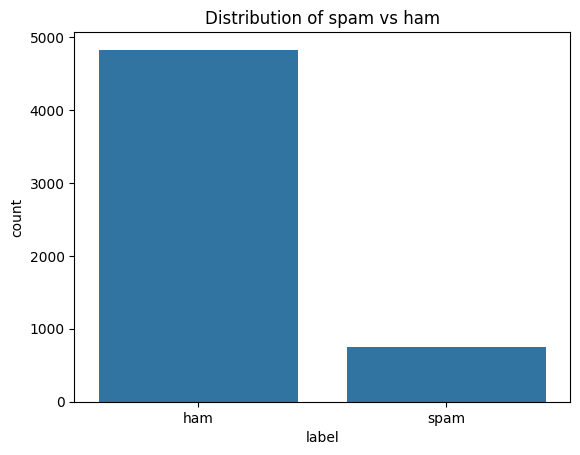

In [22]:
sns.countplot(x=df['label'])
plt.title("Distribution of spam vs ham")
plt.show()


3.3 — Message Length Feature

Spam messages usually differ in length — helps detect patterns.

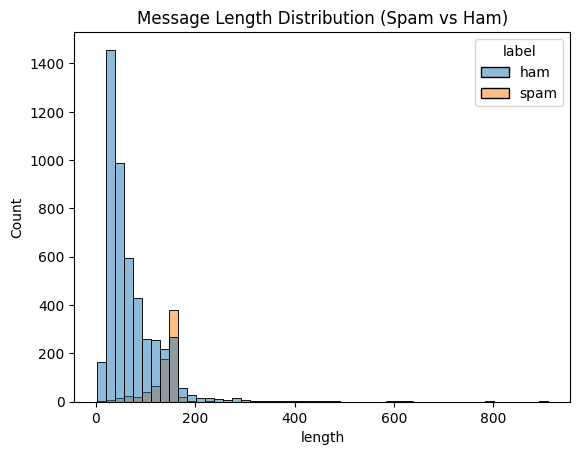

In [23]:
df['length'] = df['message'].apply(len)

sns.histplot(data=df, x='length', hue='label', bins=50)
plt.title("Message Length Distribution (Spam vs Ham)")
plt.show()


**Step 4 — Text Preprocessing**

This function cleans text for ML by removing noise and normalizing words

Define preprocessing function

In [24]:
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()                                # Lowercase
    text = nltk.word_tokenize(text)                    # Tokenization

    clean_words = []
    for word in text:
        if word.isalnum():                             # Remove punctuation & special chars
            if word not in stopwords.words('english'): # Remove stopwords
                stemmed = ps.stem(word)                # Stemming
                clean_words.append(stemmed)

    return " ".join(clean_words)


Apply preprocessing

Download required NLTK resources

NLTK needs to download the punkt tokenizer before it can tokenize text.
Because NLTK tokenizers (word_tokenizer, sent_tokenizer) require the Punkt model, and Google Colab does not have it installed by default.

In [26]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df['clean_message'] = df['message'].apply(clean_text)
df.head()


,label,message,length,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


**Step 5 — Encode Labels**

Convert labels to numbers → required for ML.

In [28]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message,length,clean_message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...,1
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,0


**Step 6 — Vectorization**

Use TF-IDF (best for text classification).

In [29]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['clean_message'])  # Feature matrix
y = df['label_num']                           # Target


Step 6.1 — Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


**Step 7 — Model Building**

7.1 — K-Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, pred_knn))


KNN Accuracy: 0.9094170403587444


7.2 — Decision Tree

In [32]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))


Decision Tree Accuracy: 0.9560538116591928


7.3 — Support Vector Machine (SVM)

In [33]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))


SVM Accuracy: 0.9802690582959641


**7.4 — Naive Bayes Models**

GaussianNB

In [34]:
# Requires dense array
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

pred_gnb = gnb.predict(X_test.toarray())
print("GaussianNB Accuracy:", accuracy_score(y_test, pred_gnb))


GaussianNB Accuracy: 0.8789237668161435


MultinomialNB

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, pred_mnb))


MultinomialNB Accuracy: 0.9641255605381166


BernoulliNB

In [36]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, pred_bnb))


BernoulliNB Accuracy: 0.9739910313901345


**Step 8 — Model Accuracy Comparison Visualization**

This chart helps determine which ML model performs best.

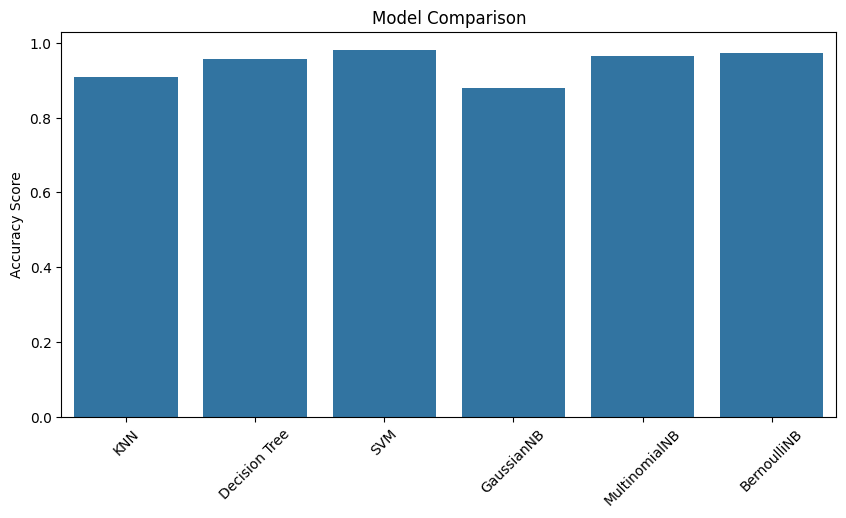

{'KNN': 0.9094170403587444,
 'Decision Tree': 0.9560538116591928,
 'SVM': 0.9802690582959641,
 'GaussianNB': 0.8789237668161435,
 'MultinomialNB': 0.9641255605381166,
 'BernoulliNB': 0.9739910313901345}

In [37]:
accuracies = {
    "KNN": accuracy_score(y_test, pred_knn),
    "Decision Tree": accuracy_score(y_test, pred_dt),
    "SVM": accuracy_score(y_test, pred_svm),
    "GaussianNB": accuracy_score(y_test, pred_gnb),
    "MultinomialNB": accuracy_score(y_test, pred_mnb),
    "BernoulliNB": accuracy_score(y_test, pred_bnb)
}

plt.figure(figsize=(10,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

accuracies


**Step 9 — Final Evaluation (Confusion Matrix for Best Model)**

Let’s assume SVM is best (usually true).

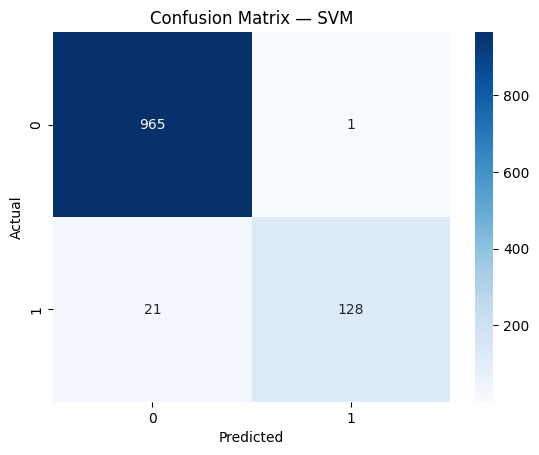

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
cm = confusion_matrix(y_test, pred_svm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, pred_svm))



## Key Terms and What They Mean

| Term / Short Name / Acronym                           | Meaning — plain English + explanation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **TF-IDF** *(or Tf-idf, TFIDF)*                       |
Stands for **Term Frequency – Inverse Document Frequency**. It’s a way to convert text (words) into numeric features for ML: <br>
• **Term Frequency (TF):** how often a word appears in a document. <br>
• **Inverse Document Frequency (IDF):** a weight that reduces common words (like “the”, “and”) and boosts rarer, more meaningful words across all documents. <br>
• Multiplying TF × IDF gives a weight per word per document.
This way common but uninformative words get low weight; rare but distinctive words get high weight.  |
| **CountVectorizer / Bag-of-Words (BoW)**              |
A simpler alternative to TF-IDF:
transforms text into a “document-term matrix” where each document is represented by counts of each word (term) in the vocabulary. So each feature = frequency of a specific word.                                                                                                                                                                                     |
| **Document-Term Matrix (DTM)**                        |
The numeric matrix produced by CountVectorizer or TF-IDF (or similar), where **rows** are documents (emails), and **columns** are terms (words).
Values are counts (BoW) or weights (TF-IDF). ML models work on such numeric matrices.                                                                                                                                                                     |
| **Naive Bayes (NB)**                                  |
A family of **probabilistic classifiers** for classification tasks.
 “Naive” because they assume all features (words in our spam example) are **conditionally independent** given the class (spam or ham).
 Despite this strong assumption, NB works very well for text classification.                                                                                                                                                                                                                                                         |
| **MultinomialNB**                                     |
A variant of Naive Bayes suitable for **count data**
(or frequency-based features, e.g. word counts or TF-IDF).
 Good for text classification — treats each feature as a count of occurrences of word across documents.                                                                                                                                                                                                        |
| **BernoulliNB**                                       |
Another variant of Naive Bayes, suited for **binary occurrence data** — i.e.
 whether a word appears or not (1/0), rather than how many times.
  Useful if you binarize your document-term matrix.                                                                                                                                                                                                                               |
| **GaussianNB**                                        |
Naive Bayes variant that assumes features are **continuous and normally distributed** (Gaussian).
It’s less ideal for sparse count/TF-IDF matrices, but can be used — especially if you have continuous numeric features or dense representation.                                                                                                                                                                                |
| **K-Nearest Neighbors (KNN)**                         |
A classification algorithm that, given a data point,
finds the “K” closest training samples (neighbors) and
 predicts the class by majority vote.
 For text, you usually convert text to numeric vectors (TF-IDF / counts) then compute “distance” (e.g. Euclidean or cosine).
 Works but can be slow for high-dimensional text data.                                                                                                                                                                                                                            |
| **Decision Tree Classifier**                          |
A tree-based algorithm: splits data based on feature values
 (e.g. presence/weight of certain words) to decide class (spam/ham).
Easy to interpret (you can visualize the tree), handles categorical or numeric features, doesn’t need scaling.                                                                                                                                                                                                                                                                                               |
| **Support Vector Machine (SVM)**                      |
A powerful classification algorithm that tries to find a hyperplane (decision boundary)
maximizing the margin between classes. Works well for high-dimensional data (like text with many features).
Often uses TF-IDF or other vector representation.                                                                                                                                                                                                                                |
| **Preprocessing (text cleaning steps)**               |
The steps we apply to raw text before feeding into ML models.
For example: <br>
• lowercase — make all letters lowercase (so “Free” and “free” are identical)  <br>
• tokenization — split text into words/tokens  <br>
• remove special characters/punctuation  <br>
• remove stop words — common words with little meaning (e.g. “the”, “is”)  <br>
• stemming — reduce words to their root form (e.g. “running” → “run”)  <br> This cleaning reduces noise and helps ML models learn.                                                                      |
| **Feature extraction / Vectorization**                |
The process of converting cleaned text into numeric features (vectors) that ML models can use.
TF-IDF and CountVectorizer are common feature-extraction methods.                                                                                                                                                                                                                                                                                                                     |
| **train_test_split**                                  |
A method to split your dataset into two parts: **training set**
(to train/fit the model) and **test set** (to evaluate on unseen data).
Helps check how well the model generalizes (predicts new data).                                                                                                                                                                                                                                                                                                                                                       |
| **Accuracy, Confusion Matrix, Classification Report** |
Metrics to evaluate a classification model.  <br>
• *Accuracy* = (correct predictions)/(total predictions)  <br>
• *Confusion Matrix* shows how many true positives/negatives, false positives/negatives  <br>
• *Classification Report* gives precision, recall, F1-score per class — useful especially when classes are imbalanced (like spam vs ham).                                                                  
---

##  Why these are useful in our Spam Classification Task

* **Text → numeric**: We cannot feed raw text to ML models. Using **preprocessing** + **TF-IDF** or **CountVectorizer** converts email text into numeric feature vectors (document-term matrix).
* **Naive Bayes / SVM / Decision Trees / KNN**: These are different classification algorithms. By trying several, we can compare which works best for spam detection on our dataset. NB is simple and fast; SVM works well for high-dimensional text; Decision Tree gives interpretability; KNN is a baseline.
* **Evaluation metrics**: Help us decide which model is better not just by overall accuracy, but by how well it handles spam vs ham (precision, recall).
* **Preprocessing** reduces noise (stop-words, punctuation), helping the models focus on meaningful words.